In [21]:
import geopandas as gpd

import rioxarray
import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
jann_loc = "/media/muskrat/T7 Shield/eco_data/v3/native/Jann/basic-extract/range_data_default.nc"

df = xr.open_dataset(jann_loc)

In [4]:
df

<xarray.Dataset>
Dimensions:            (longitude: 720, latitude: 360, SpeciesID: 47675)
Coordinates:
  * longitude          (longitude) float64 -179.8 -179.3 -178.8 ... 179.2 179.7
  * latitude           (latitude) float64 89.75 89.25 88.75 ... -89.25 -89.75
  * SpeciesID          (SpeciesID) int32 1 2 3 4 5 ... 47672 47673 47674 47675
Data variables:
    Maxent prediction  (SpeciesID, latitude, longitude) float32 ...
    Presence cells     (SpeciesID, latitude, longitude) float32 ...
    Native region      (SpeciesID, latitude, longitude) float32 ...
Attributes:
    Suggested dataset:  Retrieved native regions, density of occurrence recor...

In [10]:
# print first value of Native region in df
df["Native region"]["longitude"][0]

<xarray.DataArray 'longitude' ()>
array(-179.75)
Coordinates:
    longitude  float64 -179.8
Attributes:
    units:      degrees_east
    long_name:  longitude

In [12]:
species_1 = df["Native region"].sel(SpeciesID=1)

In [13]:
species_1

<xarray.DataArray 'Native region' (latitude: 360, longitude: 720)>
[259200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.3 -178.8 ... 178.7 179.2 179.7
  * latitude   (latitude) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
    SpeciesID  int32 1
Attributes:
    units:      presence
    long_name:  regions
    Datatype:   Native regions

In [25]:
species_1_crs = species_1.rio.write_crs("EPSG:4326", inplace=True)

In [41]:
species_2_crs = species_1.rio.set_spatial_dims(
    x_dim="longitude", y_dim="latitude", inplace=True
)

species_2_crs.rio.write_crs("EPSG:4326", inplace=True)

<xarray.DataArray 'Native region' (latitude: 360, longitude: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -179.8 -179.3 -178.8 ... 178.7 179.2 179.7
  * latitude     (latitude) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
    SpeciesID    int32 1
    spatial_ref  int64 0
Attributes:
    units:      presence
    long_name:  regions
    Datatype:   Native regions

In [42]:
species_2_crs

<xarray.DataArray 'Native region' (latitude: 360, longitude: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude    (longitude) float64 -179.8 -179.3 -178.8 ... 178.7 179.2 179.7
  * latitude     (latitude) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
    SpeciesID    int32 1
    spatial_ref  int64 0
Attributes:
    units:      presence
    long_name:  regions
    Datatype:   Native regions

In [28]:
species_1_crs.rio.crs

CRS.from_epsg(4326)

In [27]:
ecomap_loc = "/media/muskrat/T7 Shield/eco_data/ecomap_final/eco_map.geojson"

eco_map = gpd.read_file(ecomap_loc)

(30.0, -50.0)

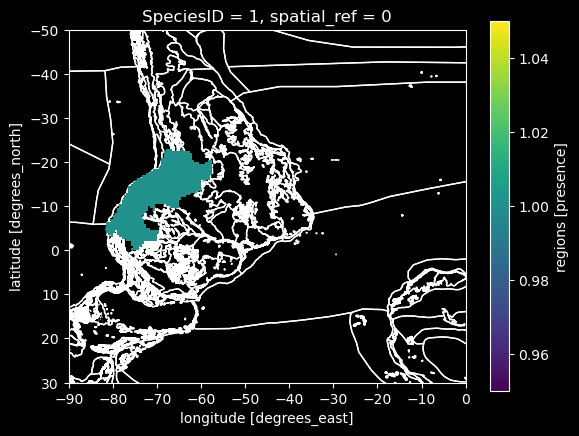

In [47]:
# limit y axis to 0 to -50 and x axis to -100 to -50

xmin, ymin, xmax, ymax = (-90, 30, 0, -50)


ax = eco_map.plot(facecolor="none", edgecolor="white")
pak = species_2_crs.plot(ax=ax, zorder=1)

# # flip map around
# ax.invert_yaxis()
# ax.invert_xaxis()


ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

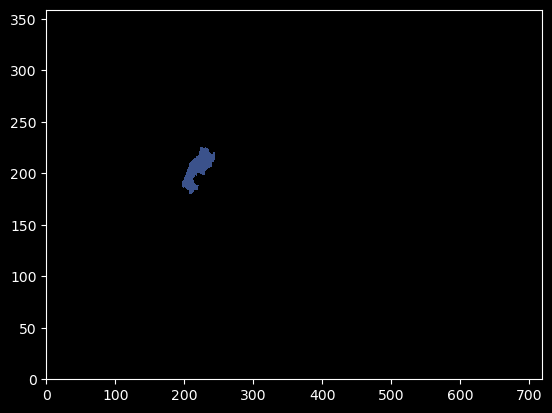

In [22]:
plt.contourf(species_1)

In [14]:
# convert species_1 to geodataframe
species_1_df = species_1.to_dataframe()

In [20]:
species_1_df.tail(100)

SpeciesID  Native region
latitude longitude                           
-89.75   130.249999          1            NaN
         130.749999          1            NaN
         131.249999          1            NaN
         131.749999          1            NaN
         132.249999          1            NaN
...                        ...            ...
         177.749999          1            NaN
         178.249999          1            NaN
         178.749999          1            NaN
         179.249999          1            NaN
         179.749999          1            NaN

[100 rows x 2 columns]

In [16]:
# plot species_1_df where longitude is x and latitude is y
species_1_df.plot(x="longitude", y="latitude")

KeyError: 'longitude'

In [5]:
crs = df.rio.crs

In [6]:
crs

In [14]:
df.attrs

{'Suggested dataset': 'Retrieved native regions, density of occurrence records and best performing Maxent predictions (cloglog transformed output) for vascular plants listed at the global IUCN redlist of threatened species (Version 2021-1)'}

In [23]:
# load csv using pandas
meta = pd.read_csv(
    "/media/muskrat/T7 Shield/eco_data/v3/native/Jann/basic-extract/metadata_default.csv"
)

In [24]:
meta.head()

,speciesID,scientificname,redlistcategory,rank,family,order,class,subdivision,division,data,...,cutoff.kappa,cutoff.spec.sens,cutoff.no.omission,cutoff.prevalence,cutoff.equal.sens.spec,cutoff.sensitivity,extent.xmin,extent.xmax,extent.ymin,extent.ymax
0,1,Aa calceata,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Occurrence data,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.5,-57.500000,-23.0,-3.620000e-07
1,2,Aa mandonii,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.5,-57.500000,-23.0,-3.620000e-07
2,3,Aa matthewsii,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Maxent prediction,...,0.879796,0.618083,0.130396,0.025598,0.404177,0.162564,-81.5,-57.500000,-23.0,-3.620000e-07
3,4,Abarema abbottii,Vulnerable,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Occurrence data,...,NaN,NaN,NaN,NaN,NaN,NaN,-72.5,-68.000000,17.5,2.000000e+01
4,5,Abarema adenophora,Least Concern,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Maxent prediction,...,0.917903,0.444638,0.255208,0.014179,0.561189,0.445130,-88.0,-45.500001,-18.5,1.550000e+01


In [6]:
# create df from meta that only includes rows where data column = Native region

native = meta[meta["data"] == "Native region"]

In [7]:
native.head()

,speciesID,scientificname,redlistcategory,rank,family,order,class,subdivision,division,data,...,cutoff.kappa,cutoff.spec.sens,cutoff.no.omission,cutoff.prevalence,cutoff.equal.sens.spec,cutoff.sensitivity,extent.xmin,extent.xmax,extent.ymin,extent.ymax
1,2,Aa mandonii,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.500000,-57.500000,-23.000000,-3.620000e-07
10,11,Abarema centiflora,Vulnerable,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.000000,-57.500000,-23.000000,-9.500000e+00
18,19,Abarema josephi,Near Threatened,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-79.500000,-66.500000,-4.500000,1.250000e+01
51,52,Abies fanjingshanensis,Endangered,SPECIES,Pinaceae,Pinales,Pinopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,96.999999,116.499999,21.000000,3.450000e+01
67,68,Abies nebrodensis,Critically Endangered,SPECIES,Pinaceae,Pinales,Pinopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,11.499999,15.999999,36.499999,3.900000e+01
